# **Assessing Community Hardship in Chicago**

Chicago, like many metropolitan areas, faces socio-economic challenges that impact its communities differently. Understanding these challenges is crucial for effective policymaking and resource allocation. In this report, we delve into a dataset provided by the city of Chicago, focusing on six key socio-economic indicators and a hardship index for each community area from 2008 to 2012.

The dataset encompasses vital metrics such as housing overcrowding, poverty rates, unemployment levels, educational attainment, dependency ratios, per capita income, and the hardship index. Each variable provides unique insights into the socio-economic landscape of Chicago's diverse neighborhoods.

## **Dataset Overview:**

*   **Community Area Number** (`ca`): Unique identifier for each community area.

*   **Community Area Name** (`community_area_name`): Name of the region within Chicago.

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Proportion of occupied housing units with multiple occupants per room.

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percentage of households living below the federal poverty line.

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percentage of individuals over 16 years old who are unemployed.

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percentage of individuals over 25 years old without a high school diploma.

*   **Percent Aged Under** 18 or Over 64: Percentage of the population under 18 or over 64 years old (dependents).

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Composite score incorporating the six selected socio-economic indicators.


## **Database Connection and Initial Analysis**

To kick off our analysis, we first established a connection with the database using SQLite and loaded the dataset provided by the city of Chicago. Below are the steps we followed:

In [18]:
# Code for database creation and dataset loading
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [19]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install -q pandas==1.1.5

In [20]:
%sql sqlite:///socioeconomic.db

'Connected: @socioeconomic.db'

Before analyzing using SQL, data needs to be stored in the database.

We will read the csv file into pandas dataframes and convert the file into a table in SQLite.

In [21]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")


In [22]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


We then explored the extremes of the hardship index to understand the socio-economic disparities across Chicago's community areas.

In [25]:
%sql select * from chicago_socioeconomic_data where hardship_index = (select max(hardship_index) from chicago_socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
54.0,Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0


The community area with the highest hardship index is Riverdale, with a score of 98.0, indicating significant socio-economic distress.

In [30]:
%sql select * from chicago_socioeconomic_data where hardship_index = (select min(hardship_index) from chicago_socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0


Conversely, Near North Side has the lowest hardship index at 1.0, reflecting comparatively lower levels of hardship.

## **Education vs Hardship**

We start by investigating the correlation between the percentage of individuals aged 25 and above without a high school diploma and the hardship index. The scatter plot below visualizes this relationship:

 * sqlite:///socioeconomic.db
Done.


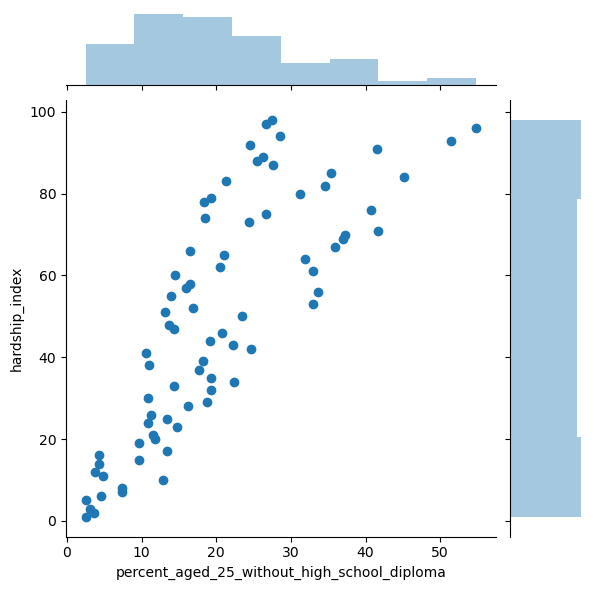

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Execute the SQL query and load the result into a pandas DataFrame
education_vs_hardship = %sql SELECT percent_aged_25_without_high_school_diploma, hardship_index FROM chicago_socioeconomic_data
education_vs_hardship = education_vs_hardship.DataFrame()

# Create a jointplot using seaborn
sns.jointplot(x='percent_aged_25_without_high_school_diploma', y='hardship_index', data=education_vs_hardship)
plt.show()

The scatter plot suggests a positive correlation between the percentage of individuals without a high school diploma and the hardship index. This indicates that areas with higher percentages of individuals lacking a high school diploma tend to experience higher levels of hardship. However, it's important to note that correlation does not imply causation, and further analysis is needed to understand the underlying factors contributing to this relationship.


## **Income vs Hardship**

Next, we explore the relationship between per capita income and hardship index. The following scatter plot illustrates this relationship:

 * sqlite:///socioeconomic.db
Done.


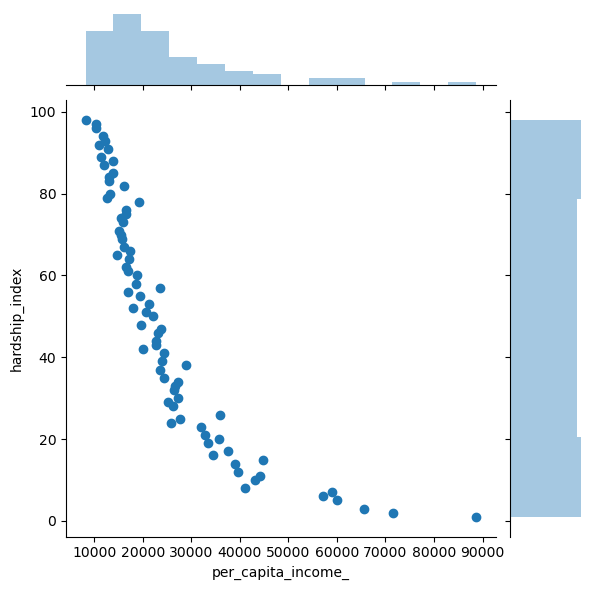

In [32]:
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

The scatter plot indicates that neighborhoods with higher per capita income tend to have lower hardship indexes, while areas with lower income levels exhibit higher hardship. Again, correlation does not imply causation, and additional factors may influence these patterns.

## **Per Capita Income vs Household Poverty**

The scatter plot below visualizes the relationship between per capita income and the percentage of households living below the federal poverty line:

 * sqlite:///socioeconomic.db
Done.


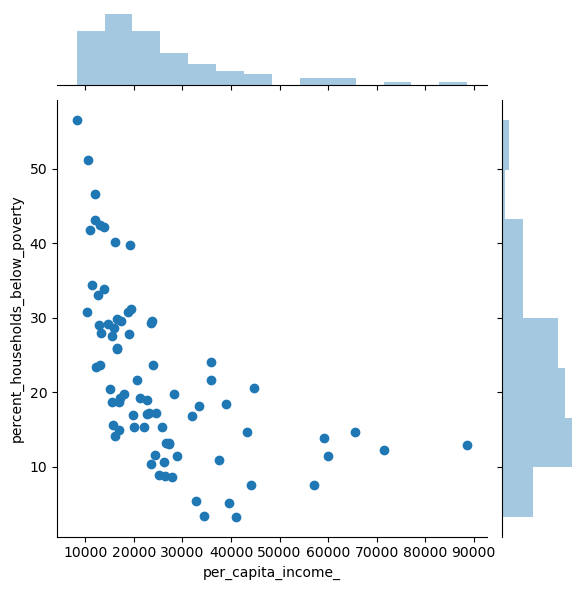

In [33]:
# Execute the SQL query and load the result into a pandas DataFrame
percent_households_below_poverty_vs_per_capita_income_ = %sql SELECT per_capita_income_, percent_households_below_poverty FROM chicago_socioeconomic_data
percent_households_below_poverty_vs_per_capita_income_ = percent_households_below_poverty_vs_per_capita_income_.DataFrame()

# Create a jointplot using seaborn
sns.jointplot(x='per_capita_income_', y='percent_households_below_poverty', data=percent_households_below_poverty_vs_per_capita_income_)
plt.show()

The scatter plot indicates a negative correlation between per capita income and the percentage of households below the federal poverty line. This suggests that neighborhoods with higher per capita incomes tend to have lower rates of household poverty, and vice versa. However, there are notable outliers in the data, indicating exceptions to this general trend.


In [34]:
%sql SELECT community_area_name as Area ,hardship_index as Hardship, per_capita_income_ as PC_income, percent_households_below_poverty as Pct_hh_below_poverty FROM chicago_socioeconomic_data where per_capita_income_ > 50000 order by per_capita_income_;

 * sqlite:///socioeconomic.db
Done.


Area,Hardship,PC_income,Pct_hh_below_poverty
North Center,6.0,57123,7.5
Near South Side,7.0,59077,13.8
Lake View,5.0,60058,11.4
Loop,3.0,65526,14.7
Lincoln Park,2.0,71551,12.3
Near North Side,1.0,88669,12.9


## **Analysis of Outliers:**

Further investigation reveals interesting outliers in the dataset. For example, the Near North Side and Loop areas exhibit high per capita incomes but also have relatively high percentages of households below the federal poverty line. This suggests the presence of **economic inequality within these affluent neighborhoods, highlighting the need for targeted interventions to address disparities.**

Conversely, the North Center area stands out for its low economic hardship despite having a lower per capita income compared to affluent neighborhoods. This may be attributed to factors such as **community resources, social support networks, or local policies that mitigate economic hardship despite lower income levels.**

## **Implications for Economic Equity:**

The disparities observed across Chicago's community areas underscore the importance of addressing economic equity. While affluent areas like Near North Side and Lincoln Park boast high per capita incomes, they also exhibit significant economic inequality, **which can exacerbate social tensions and hinder overall community well-being.**

Conversely, areas like Near South Side and North Center demonstrate the potential for economic equity, where despite lower per capita incomes, there are lower rates of household poverty. **Promoting economic equity can foster social cohesion and ensure that all residents have access to essential resources and opportunities.**

## **Top and Bottom Areas by Hardship Index**

The bar charts below visualize the top and bottom 10 areas in Chicago based on their hardship index scores:

 * sqlite:///socioeconomic.db
Done.
 * sqlite:///socioeconomic.db
Done.


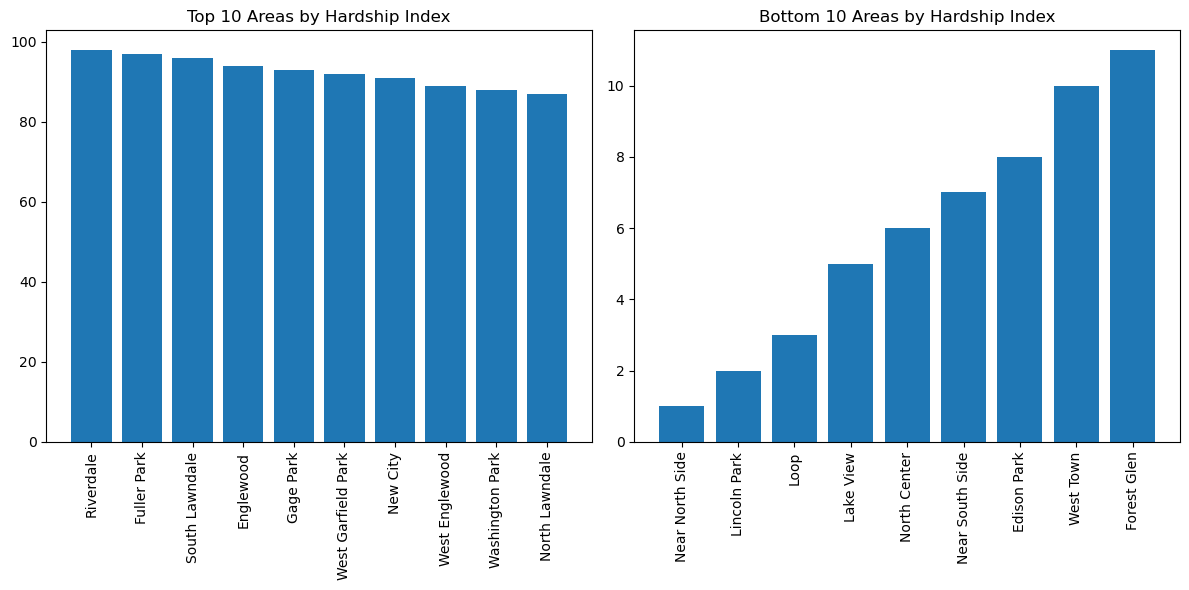

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Execute the SQL query and load the bottom 10 results into a pandas DataFrame
bottom_10 = %sql SELECT community_area_name as Area, hardship_index as Hardship FROM chicago_socioeconomic_data ORDER BY hardship_index LIMIT 10
bottom_10_df = bottom_10.DataFrame()

# Execute the SQL query and load the top 10 results into a pandas DataFrame
top_10 = %sql SELECT community_area_name as Area, hardship_index as Hardship FROM chicago_socioeconomic_data ORDER BY hardship_index DESC LIMIT 10
top_10_df = top_10.DataFrame()

# Create a combined visualization using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bottom 10 results with rotated x-axis labels
axes[1].bar(bottom_10_df['Area'], bottom_10_df['Hardship'])
axes[1].set_title('Bottom 10 Areas by Hardship Index')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot the top 10 results with rotated x-axis labels
axes[0].bar(top_10_df['Area'], top_10_df['Hardship'])
axes[0].set_title('Top 10 Areas by Hardship Index')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

The top 10 areas with the highest hardship index scores are predominantly located on the south and west sides of the city, highlighting concentrated pockets of socio-economic distress. Conversely, the bottom 10 areas with the lowest scores are clustered along the lakefront and the northwest side, indicating relatively lower levels of hardship in these regions.

### **Spatial Distribution and Inequality:**

The spatial distribution of hardship index scores across Chicago reflects significant disparities in socio-economic conditions. The gap between the highest and lowest scores is substantial, underscoring the city's high level of economic inequality. This disparity presents challenges for equitable development and underscores the need for targeted interventions in the most distressed areas.

### **Comparison with National Averages:**

The average hardship index score for Chicago is 39.4. While this figure provides a benchmark for intra-city comparison, it's essential to contextualize it within national averages. Chicago's average hardship index may indicate relatively high or low levels of socio-economic distress compared to other cities, with potential implications for policy-making and resource allocation.

### **Correlation Analysis:**

The strong negative correlation (-0.88) between hardship index and per capita income suggests that areas with higher income tend to experience lower levels of hardship. Conversely, the strong positive correlation (0.84) between hardship index and percentage of households below poverty underscores the link between poverty and socio-economic distress.

### **Implications and Policy Considerations:**

Understanding the spatial distribution of economic hardship in Chicago is crucial for informed decision-making and targeted interventions. Policies aimed at addressing economic disparities should prioritize areas with the highest hardship index scores while promoting economic equity and social cohesion across the city.

## **Conclusions**

**Addressing Root Causes of Hardship:** Chicago must prioritize addressing the root causes of hardship, including systemic issues such as poverty, unemployment, and educational disparities. Investing in education, job training programs, affordable housing initiatives, and social services can help uplift disadvantaged communities and foster long-term economic stability.

**Promoting Equitable Economic Development:** Efforts to promote equitable economic development should focus on creating opportunities for economic mobility and reducing disparities between neighborhoods. Targeted investments in infrastructure, business development, and community revitalization projects can help spur growth and enhance the overall well-being of residents across the city.

**Fostering Collaboration and Partnerships:** Addressing complex socio-economic challenges requires collaboration and partnerships among government agencies, community organizations, businesses, and residents. By fostering cross-sectoral partnerships and leveraging resources effectively, Chicago can maximize the impact of interventions and create more inclusive and resilient communities.

**Building Resilience to External Shocks:** Chicago must build resilience to external shocks, such as economic downturns, natural disasters, and public health crises. Developing robust social safety nets, emergency preparedness plans, and crisis response mechanisms can help mitigate the impact of unforeseen events and ensure the city's continued stability and prosperity.

**Embracing Innovation and Adaptation:** Chicago must embrace innovation and adaptation to thrive in an increasingly dynamic and interconnected world. By harnessing technology, data-driven insights, and evidence-based practices, the city can drive innovation across sectors and enhance its resilience to future challenges.

**Investing in Human Capital:** Chicago's greatest asset lies in its diverse and talented population. Investing in human capital through education, workforce development, and health care initiatives is essential for unlocking the city's full potential and ensuring that all residents have the opportunity to lead fulfilling and prosperous lives.

In [37]:
#Now that we've finised with the analysis, we're closing the connection:
con.close()